# Bank Project - Exploratory Data Analysis

In [ ]:
import sys
sys.path

In [164]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

## Fetch Data

In [165]:
df = pd.read_csv('./data/bank-full.csv', sep=';')

## Transform 'y' into 'target'

 + Useful for quantifying the target

In [166]:
df['target']= [1 if y=='yes' else 0 for y in df.y]

In [167]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


## Basic Descriptive Statistics

In [168]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


_Interpretation_

+ age has a min and max that look reasonable
+ balance looks right skewed
+ day has a min and max that look reasonable
+ campaign looks really skewed, need to look more at that
+ pdays is right skewed, need to take care of that -1 value
+ no null values in these features (look at 'count' for each feature)

## Visualizations of Individual features

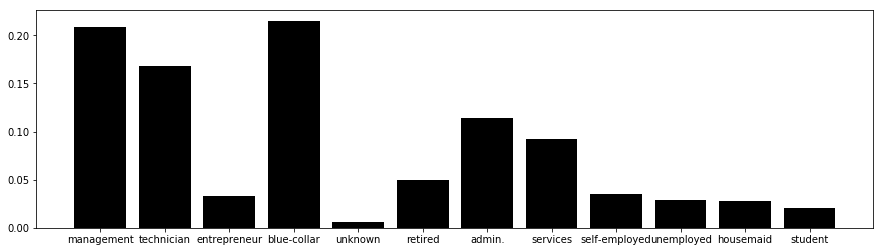

In [169]:
job_percs = np.array([*Counter(df.job).values()])/len(df.job)

job_data = dict(zip(Counter(df.job).keys(),job_percs))
plt.figure(figsize= (15,4))
plt.bar(x = job_data.keys(), height= job_data.values(), color = 'k')
plt.show()

_Interpretation_

+ There are some over and under represented jobs in the dataset
+ Obviously, there won't be a uniform distribution

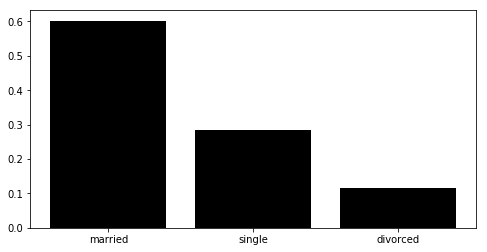

In [171]:
mar_percs = np.array([*Counter(df.marital).values()])/len(df.marital)

marital_data = dict(zip(Counter(df.marital).keys(),mar_percs))
plt.figure(figsize= (8,4))
plt.bar(x = marital_data.keys(), height= marital_data.values(), color = 'k')
plt.show()

_Interpretation_

+ A majority of participants where married

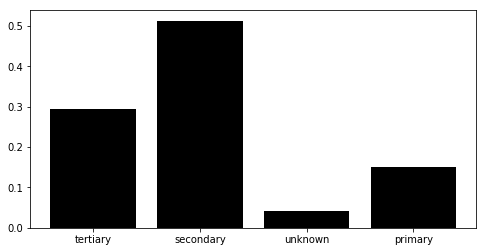

In [172]:
edu_percs = np.array([*Counter(df.education).values()])/len(df.education)

education_data = dict(zip(Counter(df.education).keys(),edu_percs))
plt.figure(figsize= (8,4))
plt.bar(x = education_data.keys(), height= education_data.values(), color = 'k')
plt.show()

_Interpretation_

+ Most customers have a secondary or tertiary education

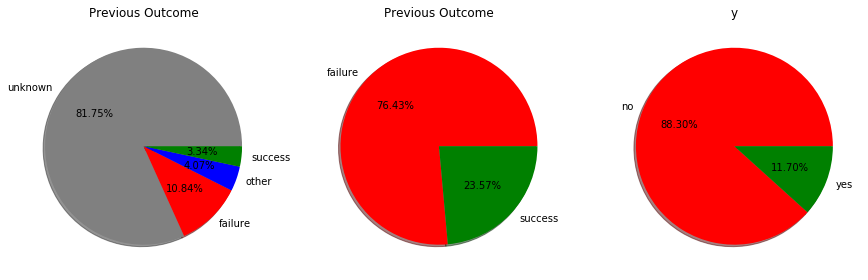

In [173]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Previous Outcome')
target_perc = df.poutcome.value_counts().values/df.poutcome.value_counts().values.sum()
plt.pie(x = target_perc, labels = df.poutcome.value_counts().keys(), shadow = True, colors = ['grey','r','b','g'], autopct='%.2f%%')

plt.subplot(1,3,2)
plt.title('Previous Outcome')
target_perc = df[df.poutcome.isin(['success','failure'])].poutcome.value_counts().values/df[df.poutcome.isin(['success','failure'])].poutcome.value_counts().values.sum()
plt.pie(x = target_perc, labels = df[df.poutcome.isin(['success','failure'])].poutcome.value_counts().keys(), shadow=True, colors = ['r','g'], autopct = '%.2f%%')

plt.subplot(1,3,3)
plt.title('y')
target_perc = df.y.value_counts().values/df.y.value_counts().values.sum()
plt.pie(x = target_perc, labels = df.y.value_counts().keys(), shadow=True, colors = ['r','g'], autopct = '%.2f%%')
plt.show()

_Interpretation_

+ Most previous outcomes are unknown, but without them, most are failures
+ Only around 12% of customers responded 'yes'

Text(0.5, 1.0, 'duration')

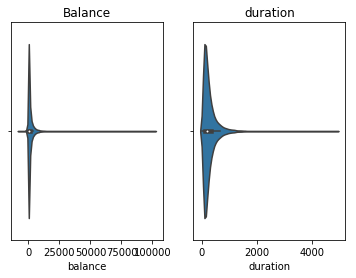

In [174]:
plt.subplot(1,2,1)
sns.violinplot(df.balance)
plt.title('Balance')

plt.subplot(1,2,2)
sns.violinplot(df.duration)
plt.title('duration')

_Interpretation_

+ Both balance and duration are extremely right skewed, this might be due to error values
+ An option to keep is to filter out those probelematic values
+ Another option is to transform them to a more normal distribution

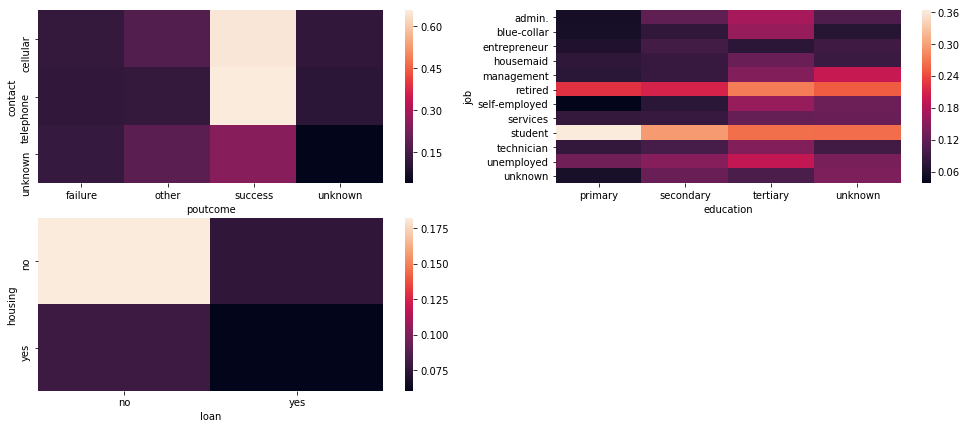

In [175]:
plt.figure(figsize=(17,7))
plt.subplot(2,2,1)
sns.heatmap(df.pivot_table(values='target',index='contact',columns='poutcome',aggfunc='mean'))
plt.subplot(2,2,2)
sns.heatmap(df.pivot_table(values='target',columns='education',index='job',aggfunc='mean'))
plt.subplot(2,2,3)
sns.heatmap(df.pivot_table(values='target',index='housing',columns='loan',aggfunc='mean'))

_Interpretation_

+ Loan and housing loans mean a lower % of 'yes'
+ Student's with a primary education have a high % of 'yes'
+ Retired with tertiary seems to mean a higher % of 'yes'
+ Obviously, previous successes mean a higher % of 'yes'

## Summary

+ Data looks pretty clean
+ We have unbalanced classes for our target
+ There are a few peaks in 'yes' for some levels of categorical variables to look at
+ We looked at a few of the numeric features, and the ones that are skewed will need transformed
